In [6]:
import cv2
import numpy as np
import mediapipe as mp
import time

In [7]:
mpHand = mp.solutions.hands

hands = mpHand.Hands(max_num_hands = 1)

In [11]:
cap = cv2.VideoCapture(0)
mpDraw = mp.solutions.drawing_utils
pTime = 0
cTime = 0
while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    results = hands.process(imgRGB)
    
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, handLms, mpHand.HAND_CONNECTIONS)
            for id, lm in enumerate(handLms.landmark):
                #print(id ,lm)
                h, w, c  = img.shape
                
                cx, cy = int(lm.x * w) , int(lm.y * h)
                
                #bilek
                if id == 0:# enum içerisinde 0 bileğe eşit görseldeki gibi.
                    cv2.circle(img,(cx,cy),9,(255,0,0),cv2.FILLED)
                    
    #FPS
    cTime = time.time()
    fps = 1/(cTime - pTime)
    pTime = cTime
    cv2.putText(img,"FPS : " + str(int(fps)),(10,75),cv2.FONT_HERSHEY_PLAIN, 2 ,(255,0,0),3)
    
    
    cv2.imshow("img", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
    
   
                
                
                
cap.release()
cv2.destroyAllWindows()

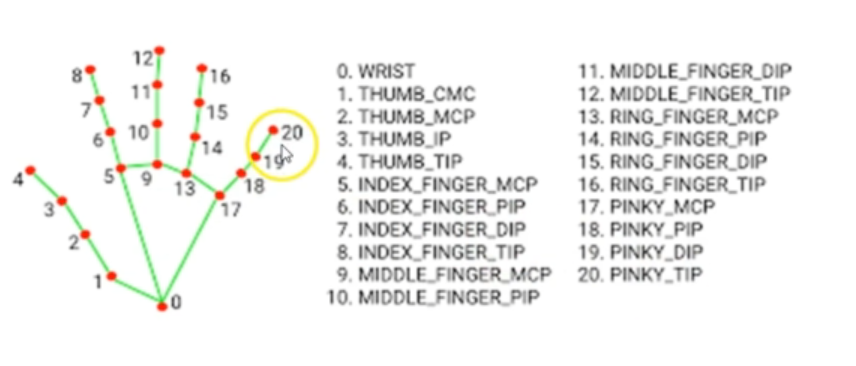